# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [58]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [60]:
print("Beginning Data Retrieval   ")
print("-----------------------------")

max_set_volume = 50
set_counter = 0
current_set = 1

master_data_list = []

for city in cities:
    set_counter = set_counter + 1
    if set_counter == max_set_volume:
        set_counter = 0
        current_set = current_set + 1
        time.sleep(5)
    record = set_counter % max_set_volume
    
    
    try:
        print(f"Processing Record {record} of Set {current_set}| {city}")

        query_url = "https://api.openweathermap.org/data/2.5/weather?q="+city+"&appid="+weather_api_key
       
        response = requests.get(query_url)
        data = response.json()
        
        lat = data["coord"]["lat"]
        lon = data["coord"]["lon"]
        temp_max = data["main"]["temp_max"]
        humidity = data["main"]["humidity"]
        cloudiness = data["clouds"]["all"]
        speed = data["wind"]["speed"]
        country = data["sys"]["country"]
        dt = data["dt"]
        
        master_data_list.append([city,lat,lon,temp_max,humidity,cloudiness,speed,country,dt])
        
        
    except Exception as ex:
        print(f"City not found. Skipping...")
        pass


print("---------------------------------------")
print("Data Retrieval Complete ")
print("---------------------------------------")

Beginning Data Retrieval   
-----------------------------
Processing Record 1 of Set 1| kottaiyur
Processing Record 2 of Set 1| gat
Processing Record 3 of Set 1| georgetown
Processing Record 4 of Set 1| constantine
Processing Record 5 of Set 1| katsuura
Processing Record 6 of Set 1| longyearbyen
Processing Record 7 of Set 1| mataura
Processing Record 8 of Set 1| thompson
Processing Record 9 of Set 1| boda
Processing Record 10 of Set 1| belushya guba
City not found. Skipping...
Processing Record 11 of Set 1| atuona
Processing Record 12 of Set 1| nisia floresta
Processing Record 13 of Set 1| tahe
Processing Record 14 of Set 1| khatanga
Processing Record 15 of Set 1| kodiak
Processing Record 16 of Set 1| simdega
Processing Record 17 of Set 1| dickinson
Processing Record 18 of Set 1| vaini
Processing Record 19 of Set 1| mersing
Processing Record 20 of Set 1| codrington
Processing Record 21 of Set 1| ribeira grande
Processing Record 22 of Set 1| manavalakurichi
Processing Record 23 of Set 1

Processing Record 39 of Set 4| marsabit
Processing Record 40 of Set 4| micco
Processing Record 41 of Set 4| tocopilla
Processing Record 42 of Set 4| yar-sale
Processing Record 43 of Set 4| nsanje
Processing Record 44 of Set 4| narsaq
Processing Record 45 of Set 4| palabuhanratu
City not found. Skipping...
Processing Record 46 of Set 4| nouadhibou
Processing Record 47 of Set 4| santa isabel do rio negro
Processing Record 48 of Set 4| alice springs
Processing Record 49 of Set 4| haimen
Processing Record 0 of Set 5| severo-kurilsk
Processing Record 1 of Set 5| zalantun
Processing Record 2 of Set 5| ambon
Processing Record 3 of Set 5| nemuro
Processing Record 4 of Set 5| san quintin
Processing Record 5 of Set 5| aswan
Processing Record 6 of Set 5| marawi
Processing Record 7 of Set 5| jacmel
Processing Record 8 of Set 5| formosa do rio preto
Processing Record 9 of Set 5| attawapiskat
City not found. Skipping...
Processing Record 10 of Set 5| westport
Processing Record 11 of Set 5| coolum be

Processing Record 35 of Set 8| avera
Processing Record 36 of Set 8| harstad
Processing Record 37 of Set 8| fare
Processing Record 38 of Set 8| talca
Processing Record 39 of Set 8| skjervoy
Processing Record 40 of Set 8| port hardy
Processing Record 41 of Set 8| san rafael
Processing Record 42 of Set 8| husavik
Processing Record 43 of Set 8| gamba
Processing Record 44 of Set 8| lorengau
Processing Record 45 of Set 8| daytona beach
Processing Record 46 of Set 8| tairua
Processing Record 47 of Set 8| victoria
Processing Record 48 of Set 8| sept-iles
Processing Record 49 of Set 8| samarai
Processing Record 0 of Set 9| achalpur
Processing Record 1 of Set 9| castlegar
Processing Record 2 of Set 9| ahipara
Processing Record 3 of Set 9| fortuna
Processing Record 4 of Set 9| torbay
Processing Record 5 of Set 9| itarema
Processing Record 6 of Set 9| darnah
Processing Record 7 of Set 9| aktash
Processing Record 8 of Set 9| negotino-polosko
City not found. Skipping...
Processing Record 9 of Set 9|

Processing Record 26 of Set 12| goderich
Processing Record 27 of Set 12| samut sakhon
Processing Record 28 of Set 12| quatre cocos
Processing Record 29 of Set 12| botou
Processing Record 30 of Set 12| kozhevnikovo
Processing Record 31 of Set 12| the pas
Processing Record 32 of Set 12| praia
Processing Record 33 of Set 12| gondar
Processing Record 34 of Set 12| shizunai
Processing Record 35 of Set 12| turukhansk
Processing Record 36 of Set 12| suarez
Processing Record 37 of Set 12| cooma
Processing Record 38 of Set 12| ulkan
Processing Record 39 of Set 12| eugene
Processing Record 40 of Set 12| dillon
Processing Record 41 of Set 12| niamey
Processing Record 42 of Set 12| pacifica
Processing Record 43 of Set 12| inhambane
Processing Record 44 of Set 12| polunochnoye
Processing Record 45 of Set 12| cascavel
Processing Record 46 of Set 12| zhangjiakou
Processing Record 47 of Set 12| port moresby
Processing Record 48 of Set 12| sokoto
Processing Record 49 of Set 12| maxixe
Processing Record

In [35]:
master_data_list

[['marystown', 47.1666, -55.1483, 292.51, 100, 63, 1.34, 'CA', 1659788834],
 ['vila', 42.0304, -8.1588, 301.87, 41, 33, 1.66, 'PT', 1659788836],
 ['chicama', -7.8447, -79.1469, 287.45, 88, 95, 2.45, 'PE', 1659788837],
 ['atar', 20.5169, -13.0499, 311.18, 18, 48, 0, 'MR', 1659788838],
 ['east london', -33.0153, 27.9116, 292.67, 59, 0, 5.14, 'ZA', 1659788840],
 ['albany', 42.6001, -73.9662, 297.61, 86, 83, 0.57, 'US', 1659788694],
 ['ternate', 0.8, 127.4, 299.79, 81, 100, 1.64, 'ID', 1659788844],
 ['rikitea', -23.1203, -134.9692, 293.36, 66, 98, 8.32, 'PF', 1659788845],
 ['yellowknife', 62.456, -114.3525, 286.44, 71, 75, 6.71, 'CA', 1659788829],
 ['mutoko', -17.397, 32.2268, 298.77, 16, 0, 3.91, 'ZW', 1659788848],
 ['iqaluit', 63.7506, -68.5145, 279, 100, 99, 1.54, 'CA', 1659788849]]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:

city_data = pd.DataFrame(master_data_list,columns = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])
city_data["Max Temp"] = city_data["Max Temp"] - 273.15 
city_data
        

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kottaiyur,10.1167,78.8167,303.66,55,100,6.31,IN,1659792387
1,gat,31.6100,34.7642,308.37,13,0,6.24,IL,1659792388
2,georgetown,5.4112,100.3354,302.01,80,20,2.57,MY,1659792240
3,constantine,36.3650,6.6147,305.82,29,20,3.09,DZ,1659792391
4,katsuura,35.1333,140.3000,297.29,82,56,2.58,JP,1659792393
...,...,...,...,...,...,...,...,...,...
568,thongwa,16.7619,96.5278,298.24,91,82,4.32,MM,1659793371
569,cairns,-16.9167,145.7667,296.12,89,100,1.03,AU,1659793094
570,kalengwa,-13.4659,25.0027,302.52,15,1,3.97,ZM,1659793374
571,caruray,10.3094,119.0128,298.37,89,100,2.48,PH,1659793376


In [129]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,19.752689,18.793991,22.033508,68.797557,58.026178,3.489284,1.659793e+09
std,33.135941,90.751641,8.371884,22.615072,38.925126,2.210288,2.960295e+02
min,-54.800000,-179.166700,-0.190000,8.000000,0.000000,0.000000,1.659792e+09
25%,-8.466700,-64.711400,15.360000,58.000000,20.000000,1.800000,1.659793e+09
50%,23.193500,25.002700,24.140000,74.000000,72.000000,3.090000,1.659793e+09
75%,47.427200,100.404600,28.210000,86.000000,100.000000,4.680000,1.659793e+09
max,78.218600,178.416700,45.250000,100.000000,100.000000,14.070000,1.659793e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [130]:
#  Get the indices of cities that have humidity over 100%.
city_data[city_data.Humidity>100].index

Int64Index([], dtype='int64')

In [131]:
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kottaiyur,10.1167,78.8167,30.51,55,100,6.31,IN,1659792387
1,gat,31.6100,34.7642,35.22,13,0,6.24,IL,1659792388
2,georgetown,5.4112,100.3354,28.86,80,20,2.57,MY,1659792240
3,constantine,36.3650,6.6147,32.67,29,20,3.09,DZ,1659792391
4,katsuura,35.1333,140.3000,24.14,82,56,2.58,JP,1659792393
...,...,...,...,...,...,...,...,...,...
568,thongwa,16.7619,96.5278,25.09,91,82,4.32,MM,1659793371
569,cairns,-16.9167,145.7667,22.97,89,100,1.03,AU,1659793094
570,kalengwa,-13.4659,25.0027,29.37,15,1,3.97,ZM,1659793374
571,caruray,10.3094,119.0128,25.22,89,100,2.48,PH,1659793376


In [132]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(city_data[city_data.Humidity>100].index, inplace=False )
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kottaiyur,10.1167,78.8167,30.51,55,100,6.31,IN,1659792387
1,gat,31.6100,34.7642,35.22,13,0,6.24,IL,1659792388
2,georgetown,5.4112,100.3354,28.86,80,20,2.57,MY,1659792240
3,constantine,36.3650,6.6147,32.67,29,20,3.09,DZ,1659792391
4,katsuura,35.1333,140.3000,24.14,82,56,2.58,JP,1659792393


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

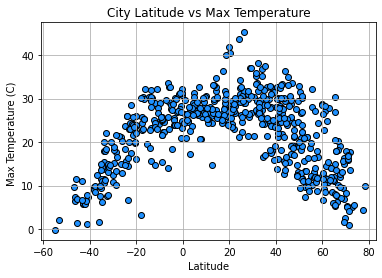

In [133]:
# Latitude vs Max Temp
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o",facecolors="dodgerblue", edgecolors="black")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (C) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-61,83)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")
# Show plot
plt.show()

## Latitude vs. Humidity Plot

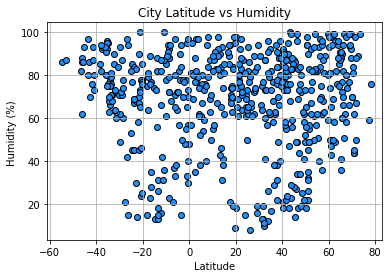

In [134]:
# Latitude vs Humidity
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o",facecolors="dodgerblue", edgecolors="black")

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-61,83)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")
# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

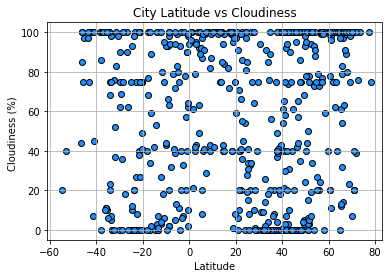

In [135]:
# Latitude vs Cloudiness
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o",facecolors="dodgerblue", edgecolors="black")

# Add chart labels
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-61,83)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")
# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

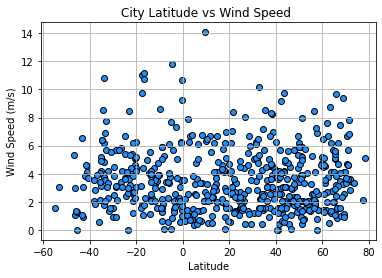

In [136]:
# Latitude vs Wind Speed 
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o",facecolors="dodgerblue", edgecolors="black")

# Add chart labels
plt.title("City Latitude vs Wind Speed ")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-61,83)

# Save the figure
plt.savefig("Lat_vs_Wind Speed.png")
# Show plot
plt.show()

## Linear Regression

In [137]:

North_Hem = clean_city_data.drop(clean_city_data[clean_city_data.Lat<0].index, inplace=False )
North_Hem.head()
South_Hem = clean_city_data.drop(clean_city_data[clean_city_data.Lat>=0].index, inplace=False )
South_Hem.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,mataura,-46.1927,168.8643,6.53,88,100,1.06,NZ,1659792396
9,atuona,-9.8000,-139.0333,24.89,78,43,8.62,PF,1659792401
10,nisia floresta,-6.0911,-35.2086,29.21,71,39,6.08,BR,1659792403
16,vaini,-21.2000,-175.2000,24.09,100,100,2.57,TO,1659792412
18,codrington,-38.2667,141.9667,9.78,85,100,3.56,AU,1659792415


###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:-0.6407562379502032


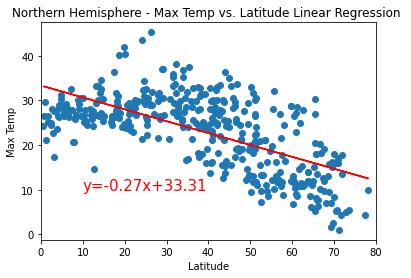

In [150]:
plt.scatter(North_Hem["Lat"], North_Hem["Max Temp"], marker="o")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(North_Hem['Lat'], North_Hem['Max Temp'])      
vc_fit = vc_slope * North_Hem['Lat'] + vc_int

plt.plot(North_Hem["Lat"], vc_fit,color='red')

# Add chart labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression ")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(False)
plt.xlim(0,80)


print(f"The r-value is:"+str(vc_r))

plt.text(10,10,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.8252783262320941


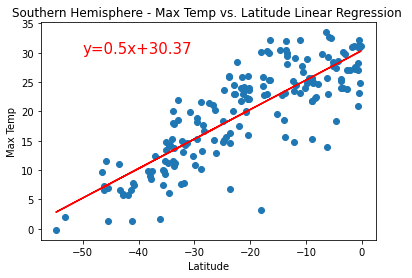

In [154]:
plt.scatter(South_Hem["Lat"], South_Hem["Max Temp"], marker="o")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(South_Hem['Lat'], South_Hem['Max Temp'])      
vc_fit = vc_slope * South_Hem['Lat'] + vc_int

plt.plot(South_Hem["Lat"], vc_fit,color='red')

# Add chart labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression ")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(False)
#plt.xlim(0,80)


print(f"The r-value is:"+str(vc_r))

plt.text(-50,30,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
# Show plot
plt.show()

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.025991117018093833


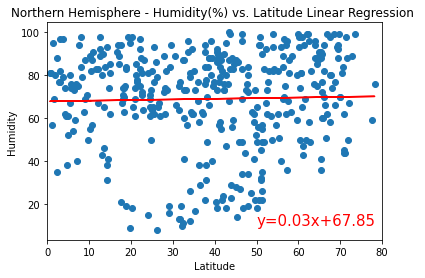

In [156]:
plt.scatter(North_Hem["Lat"], North_Hem["Humidity"], marker="o")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(North_Hem['Lat'], North_Hem['Humidity'])      
vc_fit = vc_slope * North_Hem['Lat'] + vc_int

plt.plot(North_Hem["Lat"], vc_fit,color='red')

# Add chart labels
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression ")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)
plt.xlim(0,80)


print(f"The r-value is:"+str(vc_r))

plt.text(50,10,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

# Save the figure
plt.savefig("Northern Hemisphere -Humidity(%) vs. Latitude Linear Regression.png")
# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:-0.2821562484637874


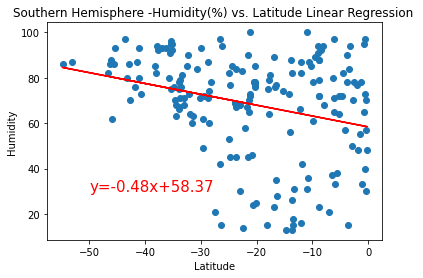

In [157]:
plt.scatter(South_Hem["Lat"], South_Hem["Humidity"], marker="o")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(South_Hem['Lat'], South_Hem['Humidity'])      
vc_fit = vc_slope * South_Hem['Lat'] + vc_int

plt.plot(South_Hem["Lat"], vc_fit,color='red')

# Add chart labels
plt.title("Southern Hemisphere -Humidity(%) vs. Latitude Linear Regression ")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)
#plt.xlim(0,80)


print(f"The r-value is:"+str(vc_r))

plt.text(-50,30,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression.png")
# Show plot
plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.003811138162378704


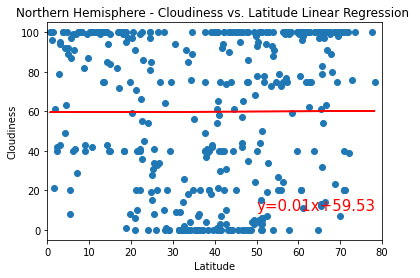

In [158]:
plt.scatter(North_Hem["Lat"], North_Hem["Cloudiness"], marker="o")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(North_Hem['Lat'], North_Hem['Cloudiness'])      
vc_fit = vc_slope * North_Hem['Lat'] + vc_int

plt.plot(North_Hem["Lat"], vc_fit,color='red')

# Add chart labels
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(False)
plt.xlim(0,80)


print(f"The r-value is:"+str(vc_r))

plt.text(50,10,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

# Save the figure
plt.savefig("Northern Hemisphere -Cloudiness vs. Latitude Linear Regression.png")
# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:-0.10636136832093111


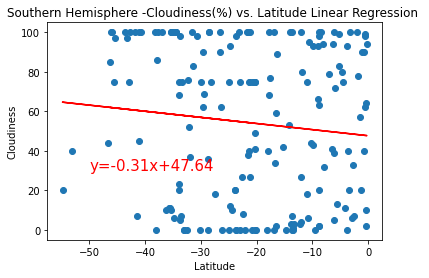

In [159]:
plt.scatter(South_Hem["Lat"], South_Hem["Cloudiness"], marker="o")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(South_Hem['Lat'], South_Hem['Cloudiness'])      
vc_fit = vc_slope * South_Hem['Lat'] + vc_int

plt.plot(South_Hem["Lat"], vc_fit,color='red')

# Add chart labels
plt.title("Southern Hemisphere -Cloudiness(%) vs. Latitude Linear Regression ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(False)
#plt.xlim(0,80)


print(f"The r-value is:"+str(vc_r))

plt.text(-50,30,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression.png")
# Show plot
plt.show()

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.08300079254488262


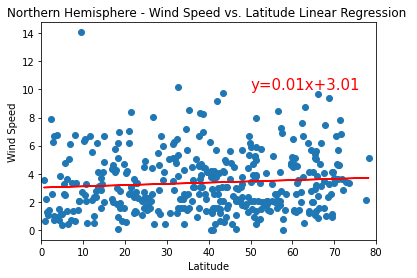

In [160]:
plt.scatter(North_Hem["Lat"], North_Hem["Wind Speed"], marker="o")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(North_Hem['Lat'], North_Hem['Wind Speed'])      
vc_fit = vc_slope * North_Hem['Lat'] + vc_int

plt.plot(North_Hem["Lat"], vc_fit,color='red')

# Add chart labels
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression ")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)
plt.xlim(0,80)


print(f"The r-value is:"+str(vc_r))

plt.text(50,10,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

# Save the figure
plt.savefig("Northern Hemisphere -Wind Speed vs. Latitude Linear Regression.png")
# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.028408264046508435


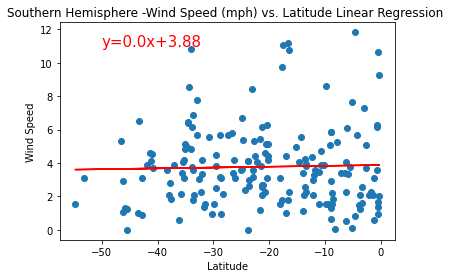

In [163]:
plt.scatter(South_Hem["Lat"], South_Hem["Wind Speed"], marker="o")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(South_Hem['Lat'], South_Hem['Wind Speed'])      
vc_fit = vc_slope * South_Hem['Lat'] + vc_int

plt.plot(South_Hem["Lat"], vc_fit,color='red')

# Add chart labels
plt.title("Southern Hemisphere -Wind Speed (mph) vs. Latitude Linear Regression ")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)
#plt.xlim(0,80)


print(f"The r-value is:"+str(vc_r))

plt.text(-50,11,"y="+str(round(vc_slope,2))+"x+"+str(round(vc_int,2)), fontsize=15, color="red")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
# Show plot
plt.show()